## Import Libraries

In [186]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',80)

In [60]:
master = pd.read_csv('data/basketball_master.csv')
teams = pd.read_csv('data/basketball_teams.csv')
coaches = pd.read_csv('data/coaches_cleaned.csv')
series_post = pd.read_csv('data/basketball_series_post.csv')
abbrev = pd.read_csv('data/basketball_abbrev.csv')
awards_coaches = pd.read_csv('data/basketball_awards_coaches.csv')
awards_players = pd.read_csv('data/award_cleaned.csv')
draft = pd.read_csv('data/basketball_draft.csv')
hof = pd.read_csv('data/basketball_hof.csv')
player_allstar = pd.read_csv('data/playerAllstar_cleaned.csv')

## Data Description

- **master**: biographical information for all the players and coaches
- **teams**: stats on each team, per year
- **coaches**: stats for each coach, per year
- **series_post**: information on post-season winners, per year
- **abbrev**: a key to the abbreviations used in other tables
- **awards_coaches**: coaching awards, per year
- **awards_players**: player awards, per year
- **draft**: draft information, per year
- **hof**: Hall of Fame information, per year
- **player_allstar**: individual player stats for the All-Star Game, per year

# Visuals showing Coaches Data in the most recent years

In [14]:
top_coaches = coaches.sort_values(by=['won'], ascending=False)
top_coaches.head(10)

,Unnamed: 0,coachID,year,teamID,leagueID,stint,won,lost,post_wins,post_losses
1076,1076,jacksph01,1995,CHI,NBA,1,72.0,10.0,15.0,3.0
391,391,sharmbi01,1971,LAL,NBA,1,69.0,13.0,12.0,3.0
1112,1112,jacksph01,1996,CHI,NBA,1,69.0,13.0,15.0,4.0
412,412,heinsto01,1972,BOS,NBA,1,68.0,14.0,7.0,6.0
232,232,hannual01,1966,PHI,NBA,1,68.0,13.0,11.0,4.0
387,387,mullajo01,1971,KEN,ABA,1,68.0,16.0,2.0,4.0
951,951,jacksph01,1991,CHI,NBA,1,67.0,15.0,15.0,7.0
1211,1211,jacksph01,1999,LAL,NBA,1,67.0,15.0,15.0,8.0
1452,1452,johnsav01,2006,DAL,NBA,1,67.0,15.0,2.0,4.0
773,773,joneskc01,1985,BOS,NBA,1,67.0,15.0,15.0,3.0


In [7]:

coaches_recent_data = coaches.sort_values(by=['year'], ascending=False)
# Shows data from 2000 - 2011
recent_coaches = coaches_recent_data.head(414)
recent_coaches

,Unnamed: 0,coachID,year,teamID,leagueID,stint,won,lost,post_wins,post_losses
1611,1611,riverdo01,2011,BOS,NBA,1,39.0,27.0,11.0,9.0
1619,1619,mchalke01,2011,HOU,NBA,1,34.0,32.0,0.0,0.0
1627,1627,johnsav01,2011,NJN,NBA,1,22.0,44.0,0.0,0.0
1626,1626,adelmri01,2011,MIN,NBA,1,26.0,40.0,0.0,0.0
1625,1625,skilesc01,2011,MIL,NBA,1,31.0,35.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1250,1250,saundfl01,2000,MIN,NBA,1,47.0,35.0,1.0,3.0
1249,1249,riverdo01,2000,ORL,NBA,1,43.0,39.0,1.0,3.0
1248,1248,rileypa01,2000,MIA,NBA,1,50.0,32.0,0.0,3.0
1247,1247,popovgr01,2000,SAS,NBA,1,58.0,24.0,7.0,6.0


## Coaches With Most Wins

In [10]:
top_recent_coaches = recent_coaches.sort_values(by=['won'], ascending=False)
top_10_recent_coaches =top_recent_coaches.head(10)
top_10_recent_coaches

,Unnamed: 0,coachID,year,teamID,leagueID,stint,won,lost,post_wins,post_losses
1452,1452,johnsav01,2006,DAL,NBA,1,67.0,15.0,2.0,4.0
1493,1493,riverdo01,2007,BOS,NBA,1,66.0,16.0,16.0,10.0
1507,1507,brownmi02,2008,CLE,NBA,1,66.0,16.0,10.0,4.0
1521,1521,jacksph01,2008,LAL,NBA,1,65.0,17.0,16.0,7.0
1430,1430,saundfl01,2005,DET,NBA,1,64.0,18.0,10.0,8.0
1427,1427,popovgr01,2005,SAS,NBA,1,63.0,19.0,7.0,6.0
1604,1604,thiboto01,2010,CHI,NBA,1,62.0,20.0,9.0,7.0
1375,1375,dantomi01,2004,PHO,NBA,1,62.0,20.0,9.0,6.0
1532,1532,riverdo01,2008,BOS,NBA,1,62.0,20.0,7.0,7.0
1548,1548,brownmi02,2009,CLE,NBA,1,61.0,21.0,6.0,5.0


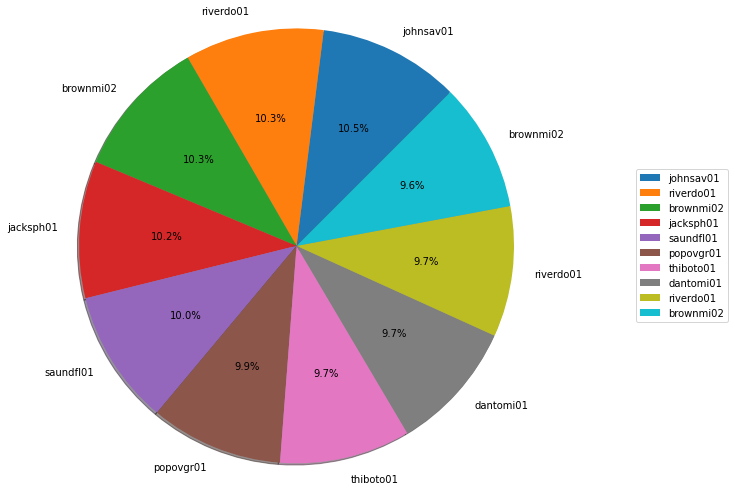

In [222]:
topRecentCoach_labels = top_10_recent_coaches.coachID.values
topRecentCoach_value = top_10_recent_coaches.won.values

# plt.title('Most recent top 10 coaches')

plt.axis("equal")
plt.pie(topRecentCoach_value,labels=topRecentCoach_labels, shadow=True, autopct='%1.1f%%',radius=2.5,counterclock=True, startangle=45)
plt.legend(loc='center left', bbox_to_anchor=(1.5, 0.5))
plt.show()

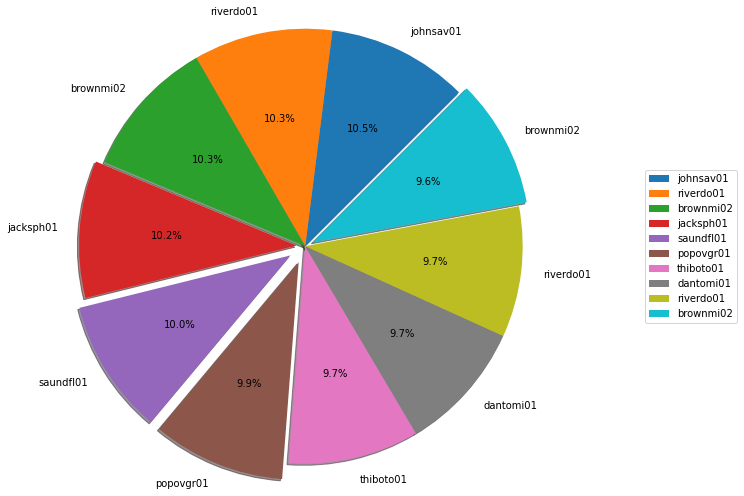

In [173]:
coaches_labels = top_10_recent_coaches.coachID.values
wins_value = top_10_recent_coaches.won.values

# plt.title('Most recent top 10 coaches')

plt.axis("equal")
plt.pie(wins_value,labels=coaches_labels, shadow=True, autopct='%1.1f%%',radius=2.5,explode=[0,0,0,0.1,0.2,0.2,0,0,0,0.1],counterclock=True, startangle=45)
plt.legend(loc='center left', bbox_to_anchor=(1.5, 0.5))
plt.show()

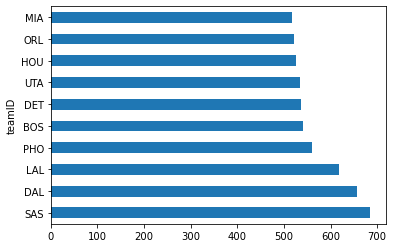

In [189]:

top_teams = recent_coaches.groupby(['teamID'])['won'].sum().sort_values(ascending = False)
top_teams = top_teams.head(10)
top_10_teams.plot.barh()
plt.show()

In [220]:
lowest_recent_coaches = coaches.sort_values(by=['lost'], ascending=False)
lowest_10_coaches =lowest_recent_coaches.head(10)
lowest_10_coaches


,Unnamed: 0,coachID,year,teamID,leagueID,stint,won,lost,post_wins,post_losses
1145,1145,hanzlbi01,1997,DEN,NBA,1,11.0,71.0,0.0,0.0
788,788,chanedo01,1986,LAC,NBA,1,12.0,70.0,0.0,0.0
1406,1406,woodsmi01,2004,ATL,NBA,1,13.0,69.0,0.0,0.0
462,462,biancal01,1974,VIR,ABA,1,15.0,69.0,0.0,0.0
1004,1004,bucknqu01,1993,DAL,NBA,1,13.0,69.0,0.0,0.0
696,696,harride02,1982,HOU,NBA,1,14.0,68.0,0.0,0.0
646,646,mottadi01,1980,DAL,NBA,1,15.0,67.0,0.0,0.0
867,867,rothsro01,1988,MIA,NBA,1,15.0,67.0,0.0,0.0
1492,1492,rileypa01,2007,MIA,NBA,1,15.0,67.0,0.0,0.0
340,340,fitchbi01,1970,CLE,NBA,1,15.0,67.0,0.0,0.0


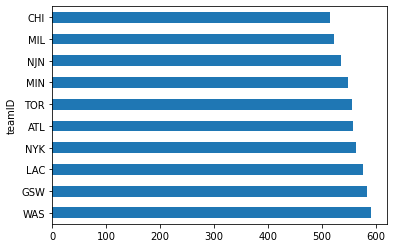

In [190]:
lowest_teams = recent_coaches.groupby(['teamID'])['lost'].sum().sort_values(ascending = False)
lowest_10_teams = lowest_teams.head(10)
lowest_10_teams.plot.barh()
plt.show()

# Highly Rated Players

## Players With Most Awards

In [219]:

# awards_players
no_of_awards = awards_players.groupby(['playerID']).award.count()
no_of_awards.sort_values( ascending = False)
no_of_awards


playerID
beatyze01    1
isselda01    1
knighbr03    1
leonaka01    1
shumpim01    1
Name: award, dtype: int64

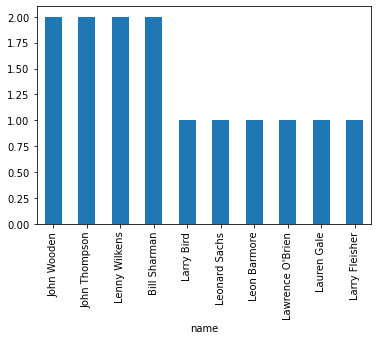

In [197]:
no_of_hof = hof.groupby(['name']).category.count()
# no_of_hof
hof_10=no_of_hof.sort_values( ascending = False).head(10)

hof_10.plot(kind="bar", label="")
plt.show()

## Highest Scoring Players

In [210]:
top_players = player_allstar.sort_values(by=['points'], ascending=False)
top_10 = top_players.head(10)


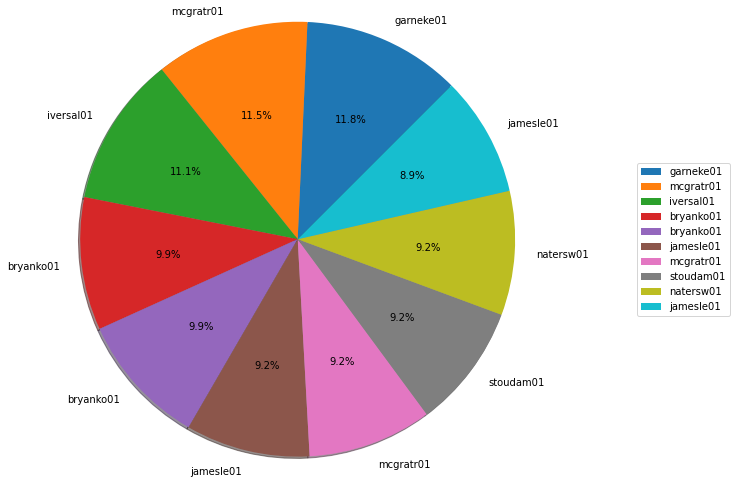

In [209]:
players_labels = top_10.player_id.values
points_value = top_10.points.values

# plt.title('Most recent top 10 coaches')

plt.axis("equal")
plt.pie(points_value,labels=players_labels, shadow=True, autopct='%1.1f%%',radius=2.5,counterclock=True, startangle=45)
plt.legend(loc='center left', bbox_to_anchor=(1.5, 0.5))
plt.show()

## Players
# top_10.plot.pie(y='points')
# plt.legend(loc='center left', bbox_to_anchor=(1.5, 0.5))
# plt.show()